%md
**Tablas de Hechos y Dimensiones en Modelos de Datos**

En el contexto del diseño de bases de datos para  las tablas de hechos y dimensiones son componentes clave para estructurar los datos de manera eficiente y facilitar el análisis.

---

### **1. Tabla de Hechos**

La tabla de hechos contiene los datos cuantitativos o medibles de un negocio. Representa los eventos o transacciones que ocurren, como ventas, ingresos o números de clics. Estas tablas suelen tener:

- **Medidas (Facts):** Valores numéricos que se analizan, como el número de unidades vendidas o el importe total de una venta.
- **Claves externas:** Referencias a las tablas de dimensiones, que permiten contextualizar las medidas.

**Ejemplo:** Una tabla de hechos para ventas podría tener las siguientes columnas:

| Fecha       | Producto_ID | Tienda_ID | Cantidad_Vendida | Importe_Total |
|-------------|-------------|-----------|-------------------|---------------|
| 2025-01-01  | 101         | 1         | 5                 | 50.00         |
| 2025-01-02  | 102         | 2         | 3                 | 30.00         |

En este ejemplo:
- “Cantidad_Vendida” e “Importe_Total” son las medidas.
- “Producto_ID”, “Tienda_ID” y “Fecha” son claves externas que enlazan con las tablas de dimensiones correspondientes.

---

### **2. Tabla de Dimensiones**

Las tablas de dimensiones almacenan información descriptiva que proporciona contexto a los datos de la tabla de hechos. Ayudan a responder preguntas como "¿Qué producto se vendió?" o "¿En qué lugar y fecha ocurrió la venta?"

- **Claves primarias:** Identificadores únicos para cada fila, que se relacionan con las claves externas de la tabla de hechos.
- **Atributos:** Columnas que describen las dimensiones, como el nombre del producto, la ubicación de la tienda o la categoría.

**Ejemplo 1:** Tabla de dimensión para productos:

| Producto_ID | Nombre_Producto | Categoría  | Precio_Unitario |
|-------------|------------------|-------------|-----------------|
| 101         | Lápiz          | Papelería   | 10.00           |
| 102         | Cuaderno        | Papelería   | 15.00           |

**Ejemplo 2:** Tabla de dimensión para tiendas:

| Tienda_ID | Nombre_Tienda | Ubicación      |
|-----------|---------------|----------------|
| 1         | Tienda Centro | Ciudad A       |
| 2         | Tienda Norte  | Ciudad B       |

---

### **3. Creación de Tablas en SQL**

A continuación se muestra un ejemplo de cómo crear tablas de hechos y dimensiones en SQL, incluyendo claves primarias y foráneas:

**Tabla de Dimensión: Productos**

```sql
CREATE TABLE Productos (
    Producto_ID INT PRIMARY KEY,
    Nombre_Producto VARCHAR(100),
    Categoría VARCHAR(50),
    Precio_Unitario DECIMAL(10, 2)
);
```

**Tabla de Dimensión: Tiendas**

```sql
CREATE TABLE Tiendas (
    Tienda_ID INT PRIMARY KEY,
    Nombre_Tienda VARCHAR(100),
    Ubicación VARCHAR(100)
);
```

**Tabla de Hechos: Ventas**

```sql
CREATE TABLE Ventas (
    Venta_ID INT PRIMARY KEY,
    Fecha DATE,
    Producto_ID INT,
    Tienda_ID INT,
    Cantidad_Vendida INT,
    Importe_Total DECIMAL(10, 2),
    FOREIGN KEY (Producto_ID) REFERENCES Productos(Producto_ID),
    FOREIGN KEY (Tienda_ID) REFERENCES Tiendas(Tienda_ID)
);
```

En este ejemplo:
- Cada tabla de dimensión tiene una clave primaria (“Producto_ID” y “Tienda_ID”).
- La tabla de hechos “Ventas” incluye una clave primaria (“Venta_ID”) y claves foráneas que enlazan con las tablas de dimensión.

---

### **4. Relación entre Tablas de Hechos y Dimensiones**

Las tablas de hechos y dimensiones se relacionan mediante claves primarias y claves externas, creando un marco lógico para analizar los datos. Esta relación permite explorar preguntas como:

1. ¿Cuántos lápices se vendieron en la Tienda Centro?
   - Se usa la tabla de hechos “Ventas” y se filtra por Producto_ID = 101 (Lápiz) y Tienda_ID = 1 (Tienda Centro).

2. ¿Cuál fue el ingreso total por categoría?
   - Se unen las tablas “Ventas” y “Productos” por Producto_ID, y se agrupan las ventas por la columna “Categoría”.

**Consulta SQL Ejemplo:**

```sql
SELECT p.Categoría, SUM(v.Importe_Total) AS Ingreso_Total
FROM Ventas v
JOIN Productos p ON v.Producto_ID = p.Producto_ID
GROUP BY p.Categoría;
```

---

### **5. Ventajas y Buenas Prácticas**

- **Ventajas:**
  - Simplifica el análisis al estructurar los datos de forma lógica.
  - Optimiza consultas analíticas.

- **Buenas prácticas:**
  - Diseña dimensiones con atributos suficientes para cubrir posibles consultas futuras.
  - Mantén las medidas en la tabla de hechos y evita duplicarlas en las dimensiones.

---

Con este enfoque, el diseño de tablas de hechos y dimensiones no solo organiza los datos de manera efectiva, sino que también habilita análisis rápidos y flexibles.



# Ejercicios SQL: Creación de Base de Datos, Tablas, Claves Primarias y Foráneas

## Introducción
Usaremos DB Fiddle como entorno de trabajo.

### Instrucciones:
1. Abre [DB Fiddle](https://www.db-fiddle.com/) en tu navegador.
2. Selecciona el motor de base de datos "MySQL 8.0" o "PostgreSQL 15".


## Ejercicio 1: Crear una Base de Datos y Tablas
### Objetivo:
Definir una base de datos con dos tablas: `Customers` y `Orders`, asegurando la integridad referencial entre ellas (Primary Keys y Foreingn Keys)


In [ ]:
-- Crear la tabla Customers
CREATE TABLE Customers (
    customer_id INT AUTO_INCREMENT PRIMARY KEY,
    first_name VARCHAR(50) NOT NULL,
    last_name VARCHAR(50) NOT NULL,
    email VARCHAR(100) UNIQUE NOT NULL,
    phone VARCHAR(15),
    created_at TIMESTAMP DEFAULT CURRENT_TIMESTAMP
);

In [ ]:
-- Crear la tabla Orders con clave foránea a Customers
CREATE TABLE Orders (
    order_id INT AUTO_INCREMENT PRIMARY KEY,
    customer_id INT,
    order_date DATE NOT NULL,
    total_amount DECIMAL(10,2) NOT NULL CHECK (total_amount > 0),
    status ENUM('Pending', 'Shipped', 'Delivered', 'Cancelled') DEFAULT 'Pending',
    FOREIGN KEY (customer_id) REFERENCES Customers(customer_id) ON DELETE CASCADE
);

## Ejercicio 2: Insertar Datos
### Objetivo:
Insertar registros en las tablas creadas y verificar que las relaciones entre las tablas funcionen correctamente haciendo consultas a ambas tablas.



In [ ]:
-- Insertar clientes en la tabla Customers
INSERT INTO Customers (first_name, last_name, email, phone) VALUES
('Juan', 'Pérez', 'juan.perez@example.com', '1234567890'),
('Maria', 'Gonzalez', 'maria.gonzalez@example.com', '0987654321'),
('Carlos', 'Ramirez', 'carlos.ramirez@example.com', '1122334455');

-- Insertar órdenes asociadas a los clientes
INSERT INTO Orders (customer_id, order_date, total_amount, status) VALUES
(1, '2025-01-10', 150.75, 'Shipped'),
(2, '2025-01-12', 89.50, 'Delivered'),
(3, '2025-01-15', 220.00, 'Pending'),
(1, '2025-01-20', 300.25, 'Cancelled');


## Ejercicio 3: Consultar Datos Relacionados
### Objetivo:
Realizar consultas para unir las tablas y obtener información combinada.

-- Consultar los pedidos con el nombre del cliente

-- Consultar el total de pedidos por cliente



In [ ]:
--  Consultar todas las órdenes con los datos del cliente correspondiente
SELECT 
    o.order_id, 
    o.order_date, 
    o.total_amount, 
    o.status,
    c.first_name, 
    c.last_name, 
    c.email
FROM Orders o
JOIN Customers c ON o.customer_id = c.customer_id;


In [ ]:
--  Obtener las órdenes de un cliente específico (ejemplo: Juan Pérez)
SELECT 
    o.order_id, 
    o.order_date, 
    o.total_amount, 
    o.status
FROM Orders o
JOIN Customers c ON o.customer_id = c.customer_id
WHERE c.first_name = 'Juan' AND c.last_name = 'Pérez';


In [ ]:
-- Contar cuántas órdenes tiene cada cliente
SELECT 
    c.customer_id,
    c.first_name, 
    c.last_name, 
    COUNT(o.order_id) AS total_orders
FROM Customers c
LEFT JOIN Orders o ON c.customer_id = o.customer_id
GROUP BY c.customer_id, c.first_name, c.last_name;


In [ ]:
-- Ver órdenes que aún están pendientes
SELECT * FROM Orders WHERE status = 'Pending';

## Ejercicio 4: Añadir una Tabla para Productos
### Objetivo:
Crear una tabla `Products` y establecer una relación con `Orders` a través de una tabla intermedia `OrderDetails`.






In [ ]:
-- Crear la tabla Products
CREATE TABLE Products (
    product_id INT AUTO_INCREMENT PRIMARY KEY,
    name VARCHAR(100) NOT NULL,
    description TEXT,
    price DECIMAL(10,2) NOT NULL DEFAULT 0.00,
    stock INT NOT NULL CHECK (stock >= 0),
    created_at TIMESTAMP DEFAULT CURRENT_TIMESTAMP
);

In [ ]:
-- Crear la tabla intermedia OrderDetails para la relación N:M entre Orders y Products
CREATE TABLE OrderDetails (
    order_detail_id INT AUTO_INCREMENT PRIMARY KEY,
    order_id INT,
    product_id INT,
    quantity INT NOT NULL CHECK (quantity > 0),
    subtotal DECIMAL(10,2) NOT NULL,
    FOREIGN KEY (order_id) REFERENCES Orders(order_id) ON DELETE CASCADE,
    FOREIGN KEY (product_id) REFERENCES Products(product_id) ON DELETE CASCADE
);

## Ejercicio 5: Restricciones y Validaciones
### Objetivo:
Modificar las tablas existentes para agregar restricciones adicionales, como valores únicos o valores por defecto.

-- Modificar la tabla Customers para que el correo electrónico sea único

-- Modificar la tabla Products para que el precio tenga un valor por defecto

-- Insertar un producto sin especificar precio (debería tomar el valor por defecto)

---

## Soluciones
1. **Ejercicio 1:** Verifica que las tablas se creen correctamente y que `Orders` tiene una clave foránea apuntando a `Customers`.
2. **Ejercicio 2:** Los datos deben insertarse sin errores, y las consultas mostrarán los datos relacionados.
3. **Ejercicio 3:** Las consultas devolverán los pedidos con nombres de clientes y totales.
4. **Ejercicio 4:** Realizar una consulta que mostrará los productos incluidos en los pedidos y el subtotal calculado.
5. **Ejercicio 5:** Se agregan las restricciones correctamente, y la consulta muestra que el precio por defecto se aplica al nuevo producto.

In [ ]:
-- Asegurar que el correo electrónico en Customers sea único
ALTER TABLE Customers ADD CONSTRAINT unique_email UNIQUE (email);

-- Modificar la tabla Products para que el precio tenga un valor por defecto
ALTER TABLE Products MODIFY price DECIMAL(10,2) NOT NULL DEFAULT 10.00;

- Insertar un producto sin especificar el precio



In [ ]:
INSERT INTO Products (name, description, stock) 
VALUES ('Laptop HP', 'Laptop con 16GB RAM y 512GB SSD', 15);

-- Verificar si el precio se asignó por defecto
SELECT * FROM Products;

- Intentar insertar un cliente con un email duplicado

In [ ]:
INSERT INTO Customers (first_name, last_name, email, phone) 
VALUES ('Pedro', 'Gomez', 'juan.perez@example.com', '1112223333');


### Prueba de la Relación N:M (Órdenes y Productos)

In [ ]:
--  Insertar productos en la tabla Products
INSERT INTO Products (name, description, price, stock) VALUES
('iPhone 14', 'Smartphone Apple', 999.99, 10),
('Samsung Galaxy S23', 'Smartphone Samsung', 899.99, 20),
('Mouse Logitech', 'Mouse inalámbrico', 29.99, 50);


In [ ]:
-- Asignar productos a una orden
INSERT INTO OrderDetails (order_id, product_id, quantity, subtotal) VALUES
(1, 1, 2, 1999.98),  -- Cliente 1 compra 2 iPhones
(2, 2, 1, 899.99),   -- Cliente 2 compra 1 Samsung Galaxy
(3, 3, 3, 89.97);    -- Cliente 3 compra 3 Mouse Logitech

In [ ]:
-- Consultar pedidos con los productos comprados
SELECT 
    o.order_id, 
    c.first_name, 
    c.last_name, 
    p.name AS product_name, 
    od.quantity, 
    od.subtotal
FROM OrderDetails od
JOIN Orders o ON od.order_id = o.order_id
JOIN Customers c ON o.customer_id = c.customer_id
JOIN Products p ON od.product_id = p.product_id;

---

In [ ]:
CREATE TABLE `Customers` (
	`customer_id` INTEGER NOT NULL AUTO_INCREMENT UNIQUE,
	`first_name` VARCHAR(50) NOT NULL,
	`last_name` VARCHAR(50) NOT NULL,
	`email` VARCHAR(100) NOT NULL UNIQUE,
	`phone` VARCHAR(15),
	`created_at` TIMESTAMP DEFAULT CURRENT_TIMESTAMP,
	PRIMARY KEY(`customer_id`)
);


CREATE TABLE `Orders` (
	`order_id` INTEGER NOT NULL AUTO_INCREMENT UNIQUE,
	`order_date` DATE NOT NULL,
	`total_amount` DECIMAL NOT NULL CHECK(total_amount > 0),
	`status` ENUM('Pending', 'Shipped', 'Delivered', 'Cancelled') DEFAULT 'Pending',
	`customer_id` INTEGER,
	PRIMARY KEY(`order_id`)
);


CREATE TABLE `Products` (
	`product_id` INTEGER NOT NULL AUTO_INCREMENT UNIQUE,
	`name ` VARCHAR(100) NOT NULL,
	`desciption ` TEXT(65535),
	`price` DECIMAL NOT NULL DEFAULT 10.00,
	`stock` INTEGER NOT NULL CHECK(stock >= 0),
	`created_at` TIMESTAMP DEFAULT CURRENT_TIMESTAMP,
	PRIMARY KEY(`product_id`)
);


CREATE TABLE `OrderDetails` (
	`order_detail_id` INTEGER NOT NULL AUTO_INCREMENT UNIQUE,
	`order_id` INTEGER,
	`product_id` INTEGER,
	`quantity` INTEGER NOT NULL CHECK(quantity > 0),
	`subtotal ` DECIMAL NOT NULL,
	PRIMARY KEY(`order_detail_id`)
);


ALTER TABLE `Products`
ADD FOREIGN KEY(`product_id`) REFERENCES `OrderDetails`(`product_id`)
ON UPDATE NO ACTION ON DELETE CASCADE;
ALTER TABLE `Orders`
ADD FOREIGN KEY(`order_id`) REFERENCES `OrderDetails`(`order_id`)
ON UPDATE NO ACTION ON DELETE NO ACTION;
ALTER TABLE `Customers`
ADD FOREIGN KEY(`customer_id`) REFERENCES `Orders`(`customer_id`)
ON UPDATE NO ACTION ON DELETE NO ACTION;

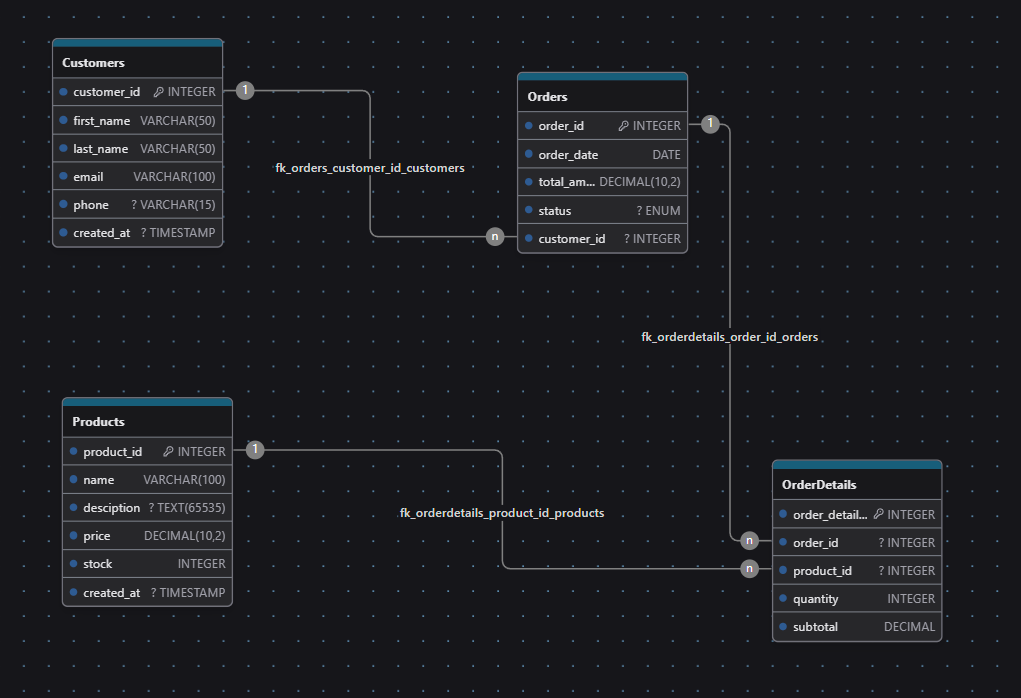